In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("C:\\Users\\Basudev\\Downloads\\Datasets\\datascienceforbusiness-master")

In [2]:
churn_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
churn_df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [6]:
churn_df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [7]:
len(churn_df.MonthlyCharges.unique())

1585

In [8]:
churn_df.shape

(7043, 21)

In [9]:
churn_df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [10]:
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
churn_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
churn_df['Churn'].value_counts(sort = False)

Yes    1869
No     5174
Name: Churn, dtype: int64

In [13]:
churn_df_copy = churn_df.copy()

In [14]:
churn_df_copy.drop(['customerID', 'MonthlyCharges', 'TotalCharges', 'tenure'], axis = 1, inplace = True)
churn_df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [15]:
summary = pd.concat([pd.crosstab(churn_df_copy[x], churn_df_copy.Churn) for x in churn_df_copy.columns[:-1]],
                   keys = churn_df_copy.columns[: -1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [16]:
summary['Churned_Percentage'] = summary['Yes']/(summary['Yes'] + summary['No'])
summary

Churn                                         No   Yes  Churned_Percentage
gender           Female                     2549   939            0.269209
                 Male                       2625   930            0.261603
SeniorCitizen    0                          4508  1393            0.236062
                 1                           666   476            0.416813
Partner          No                         2441  1200            0.329580
                 Yes                        2733   669            0.196649
Dependents       No                         3390  1543            0.312791
                 Yes                        1784   326            0.154502
PhoneService     No                          512   170            0.249267
                 Yes                        4662  1699            0.267096
MultipleLines    No                         2541   849            0.250442
                 No phone service            512   170            0.249267
                 Yes                        2121   850            0.286099
InternetService  DSL                        1962   459            0.189591
                 Fiber optic                1799  1297            0.418928
                 No                         1413   113            0.074050
OnlineSecurity   No                         2037  1461            0.417667
                 No internet service        1413   113            0.074050
                 Yes                        1724   295            0.146112
OnlineBackup     No                         1855  1233            0.399288
                 No internet service        1413   113            0.074050
                 Yes                        1906   523            0.215315
DeviceProtection No                         1884  1211            0.391276
                 No internet service        1413   113            0.074050
                 Yes                        1877   545            0.225021
TechSupport      No                         2027  1446            0.416355
                 No internet service        1413   113            0.074050
                 Yes                        1734   310            0.151663
StreamingTV      No                         1868   942            0.335231
                 No internet service        1413   113            0.074050
                 Yes                        1893   814            0.300702
StreamingMovies  No                         1847   938            0.336804
                 No internet service        1413   113            0.074050
                 Yes                        1914   818            0.299414
Contract         Month-to-month             2220  1655            0.427097
                 One year                   1307   166            0.112695
                 Two year                   1647    48            0.028319
PaperlessBilling No                         2403   469            0.163301
                 Yes                        2771  1400            0.335651
PaymentMethod    Bank transfer (automatic)  1286   258            0.167098
                 Credit card (automatic)    1290   232            0.152431
                 Electronic check           1294  1071            0.452854
                 Mailed check               1304   308            0.191067

VISUALIZATIONS

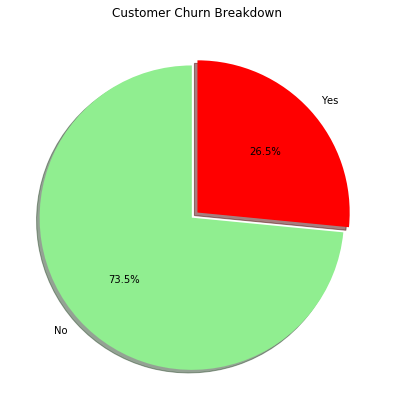

In [17]:
from pylab import rcParams
labels = churn_df['Churn'].value_counts(sort = True).index
sizes = churn_df['Churn'].value_counts(sort = True)
colors = ['lightgreen', 'red']
explode = (0.05, 0)
rcParams['figure.figsize'] = 7, 7

#Pie Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Customer Churn Breakdown')
plt.show()

C:\Users\Basudev\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


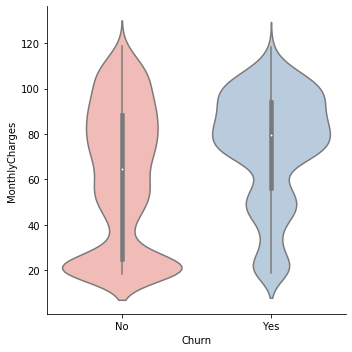

In [18]:
#Violin Plot
g = sns.factorplot(x = "Churn", y = 'MonthlyCharges', data = churn_df, kind = 'violin', palette = 'Pastel1')

C:\Users\Basudev\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


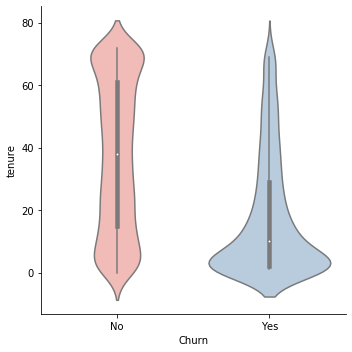

In [19]:
g = sns.factorplot(x = "Churn", y = 'tenure', data = churn_df, kind = 'violin', palette = 'Pastel1')

No handles with labels found to put in legend.


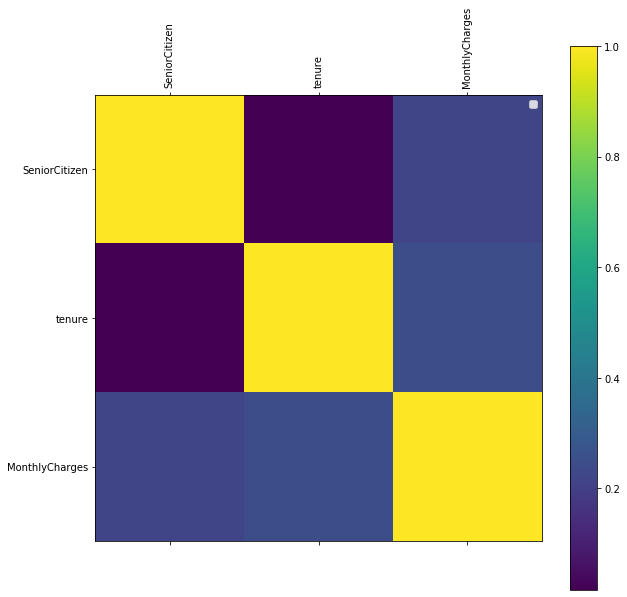

In [20]:
#Correlation Plot
def plot_corr(df, size = 10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(churn_df)

In [21]:
#Check for Empty Fields
len(churn_df[churn_df['TotalCharges'] == " "])

11

In [22]:
churn_df = churn_df[churn_df['TotalCharges'] != " "]

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Id_col = ['customerID']
target_col = ['Churn']
cat_cols = churn_df.nunique()[churn_df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]
num_cols = [x for x in churn_df.columns if x not in cat_cols + target_col + Id_col]
bin_cols = churn_df.nunique()[churn_df.nunique() == 2].keys().tolist()
multi_cols = [x for x in cat_cols if x not in bin_cols]

le = LabelEncoder()
for i in bin_cols:
    churn_df[i] = le.fit_transform(churn_df[i])

C:\Users\Basudev\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
churn_df = pd.get_dummies(data = churn_df, columns = multi_cols)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [25]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'])
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
      

In [26]:
std = StandardScaler()
scaled = std.fit_transform(churn_df[num_cols])
scaled = pd.DataFrame(scaled, columns = num_cols)
df_telcom_og = churn_df.copy()
churn_df = churn_df.drop(columns = num_cols, axis = 1)
churn_df = churn_df.merge(scaled, left_index = True, right_index = True, how = 'left')

In [27]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int32  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int32  
 4   Dependents                               7032 non-null   int32  
 5   PhoneService                             7032 non-null   int32  
 6   PaperlessBilling                         7032 non-null   int32  
 7   Churn                                    7032 non-null   int32  
 8   MultipleLines_No                         7032 non-null   uint8  
 9   MultipleLines_No phone service           7032 non-null   uint8  
 10  MultipleLines_Yes                        7032 no

In [28]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,1,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,1,1,1,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [29]:
churn_df.drop(['customerID'], axis = 1, inplace = True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [30]:
churn_df = churn_df.dropna()

In [31]:
churn_df[churn_df.isnull().any(axis = 1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges


In [32]:
#Train test Split
from sklearn.model_selection import train_test_split
X = churn_df.drop(['Churn'], axis = 1).values
Y = churn_df['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.383881,-0.252568,-0.379399
1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.139417,-1.482464,-0.760828
2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.280248,-1.317924,-0.996268
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.186535,0.026652,0.013456
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.098673,-0.812669,-0.483652


In [33]:
len(churn_df.columns)

41

In [34]:
churn_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_E

In [35]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print("Accuracy: ", score)
print("Confusion Matrix: ", confusion_matrix(y_test, predictions))
print("Classification Report: ", classification_report(y_test, predictions))

Accuracy:  0.7893238434163701
Confusion Matrix:  [[919 142]
 [154 190]]
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.87      0.86      1061
           1       0.57      0.55      0.56       344

    accuracy                           0.79      1405
   macro avg       0.71      0.71      0.71      1405
weighted avg       0.79      0.79      0.79      1405



In [37]:
#Feature Importance
coef = model.coef_[0]
coef = [abs(number) for number in coef]
coef

[0.047514943550556604,
 0.1647553985234993,
 0.20302343910535392,
 0.17120208691016364,
 0.11948956966110275,
 0.26079174261913984,
 0.06014629335934569,
 0.11947849979583149,
 0.05934327630170495,
 0.3409660514795118,
 0.42304554325686655,
 0.08209056164255923,
 0.3124258790577669,
 0.08209056164255923,
 0.23034638728039777,
 0.2373501112133769,
 0.08209056164255923,
 0.15527061943606102,
 0.10958838807207397,
 0.08209056164255923,
 0.027508896294742426,
 0.2249317671227675,
 0.08209056164255923,
 0.14285227534536155,
 0.03359491804546696,
 0.08209056164255923,
 0.11567440982275735,
 0.06599353358713493,
 0.08209056164255923,
 0.1480730253644319,
 1.154284539191897,
 0.06396652913064528,
 1.0903290799264658,
 0.13645716398682325,
 0.25004221616252076,
 0.3150784087706778,
 0.07140990151338719,
 0.019452315283321742,
 0.05992567561800842,
 0.09087624460826312]

In [38]:
#Finding and Deleting Label Columns
cols = list(churn_df.columns)
cols.index('Churn')

6

In [39]:
del cols[6]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'Tota

In [40]:
#Sorting on Feature Importance
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

Contract_Month-to-month
Contract_Two year
InternetService_Fiber optic
InternetService_DSL
PaymentMethod_Electronic check
OnlineSecurity_No
PaperlessBilling
PaymentMethod_Credit card (automatic)
OnlineBackup_No
OnlineSecurity_Yes
TechSupport_No
Partner
Dependents
SeniorCitizen
OnlineBackup_Yes
StreamingMovies_Yes
TechSupport_Yes
PaymentMethod_Bank transfer (automatic)
PhoneService
MultipleLines_No phone service
StreamingTV_Yes
DeviceProtection_No
TotalCharges
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
PaymentMethod_Mailed check
StreamingMovies_No
Contract_One year
MultipleLines_No
MonthlyCharges
MultipleLines_Yes
gender
StreamingTV_No
DeviceProtection_Yes
tenure


In [41]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
predictions = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)
print("Accuracy: ", score)
print("Confusion Matrix: ", confusion_matrix(y_test, predictions))
print("Classification Reprt: ", classification_report(y_test, predictions))

Accuracy:  0.7658362989323844
Confusion Matrix:  [[913 148]
 [181 163]]
Classification Reprt:                precision    recall  f1-score   support

           0       0.83      0.86      0.85      1061
           1       0.52      0.47      0.50       344

    accuracy                           0.77      1405
   macro avg       0.68      0.67      0.67      1405
weighted avg       0.76      0.77      0.76      1405



In [42]:
#Deep Learning 
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = 40))
model.add(Dense(units = 2000, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Using TensorFlow backend.
C:\Users\Basudev\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Basudev\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Basudev\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Basudev\anaconda3\lib\site-packages\tensorflow\python\framework\d

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              42000     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2001      
Total params: 44,821
Trainable params: 44,821
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train,
                   y_train,
                   batch_size = 64,
                   epochs = 25,
                   verbose = 1,
                   validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])
predictions = model.predict(X_test)
prediction = (predictions > 0.5)
#print(confusion_matrix(y_test, predictions))
#print(classification_report(y_test, predictions))

Instructions for updating:
Use tf.cast instead.
Train on 5616 samples, validate on 1405 samples
Epoch 1/25
5616/5616 [==============================] - 0s 73us/step - loss: 0.4967 - accuracy: 0.7514 - val_loss: 0.4296 - val_accuracy: 0.7907
Epoch 2/25
5616/5616 [==============================] - 0s 37us/step - loss: 0.4433 - accuracy: 0.7838 - val_loss: 0.4212 - val_accuracy: 0.7929
Epoch 3/25
5616/5616 [==============================] - 0s 34us/step - loss: 0.4387 - accuracy: 0.7858 - val_loss: 0.4304 - val_accuracy: 0.7822
Epoch 4/25
5616/5616 [==============================] - 0s 35us/step - loss: 0.4365 - accuracy: 0.7913 - val_loss: 0.4342 - val_accuracy: 0.7815
Epoch 5/25
5616/5616 [==============================] - 0s 34us/step - loss: 0.4336 - accuracy: 0.7911 - val_loss: 0.4230 - val_accuracy: 0.7851
Epoch 6/25
5616/5616 [==============================] - 0s 33us/step - loss: 0.4328 - accuracy: 0.7881 - val_loss: 0.4201 - val_accuracy: 0.7851
Epoch 7/25
5616/5616 [============